# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają na celu wyłapać podstawowe błędy. Przejście przez kod wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem). Rozmiar poziomy figur nie powinien przekraczać 20 cali.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu:
Członkowie:

---

## Zestaw zadań 1: Elementy statystyki opisowej 1 (Notatnik 3/3)

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
import random as rnd

### Wczytanie danych

Poniższy kod wczytuje do zmiennej `eruptions_data` dane z przygotowanego wcześniej pliku eruptions_data.pkl.
Wyświetl przygotowaną tablicę.

In [3]:
eruptions_data = pd.read_pickle("eruption_data.pkl")
eruptions_data

,Volcano Name,Eruption Category,VEI,Start Year,Start Month,Start Day,End Year,End Month,End Day,Evidence Type,Evidence Method
Eruption Number,,,,,,,,,,,
22486,Cotopaxi,Confirmed,2.0,2022,10.0,21.0,2022.0,12.0,19.0,Observations,Reported
22481,Taal,Confirmed,1.0,2022,10.0,5.0,2022.0,10.0,29.0,Observations,Reported
22458,Turrialba,Confirmed,1.0,2022,7.0,17.0,2022.0,7.0,17.0,Observations,Reported
22453,Ulawun,Confirmed,2.0,2022,6.0,2.0,2022.0,6.0,2.0,Observations,Reported
22454,Raung,Confirmed,2.0,2022,5.0,14.0,2022.0,9.0,27.0,Observations,Satellite (infrared)
...,...,...,...,...,...,...,...,...,...,...,...
14556,Tongariro,Confirmed,5.0,-9650,NaN,NaN,NaN,NaN,NaN,Correlation,Tephrochronology
21101,Craters of the Moon,Confirmed,0.0,-10060,NaN,NaN,NaN,NaN,NaN,Isotopic,14C (uncalibrated)
22141,Igwisi Hills,Confirmed,1.0,-10450,NaN,NaN,NaN,NaN,NaN,Isotopic,Cosmic Ray Exposure


### Zadanie 4: Konstrukcja szeregów rodzielczych - bardziej skomplikowane tablice [10 pkt]

#### a) Forma tabelaryczna
Przygotuj szeregi rozdzielcze VEI w formie tablicy `vei_data` zawierającej następujące elementy:

> Indeks: VEI </br>
> Wartości VEI posortowane od najmniejszej do największej.

> Kolumny: 2-poziomowe nagłówki, dla każdego z nagłówków 1 poziomu powtarza się cały zestaw nagłówków 2 poziomu

>> Nagłówki 1 poziomu: All, Confirmed Eruption, Uncertain Eruption </br>
>> Całość danych oraz grupy wyznaczone na podstawie kolumny Eruption category</br>

>> Nagłówki 2 poziomu: f, cf, rf, crf </br>
>> Zliczenia poszczególnych kategorii (ang. frequency, absolute frequency), zliczenia skumulowane poszczególnych kategorii (ang. cumulative frequency, cumulative absolute frequency),  rf - częstość zliczeń poszczególnych kategorii (ang. relative frequency), crf - skumulowana częstość zliczeń poszczególnych kategorii (ang. cumulative relative frequency)

Wyświetl przygotowane tablicę w taki sposób, aby liczby w kolumnach f i cf oraz indeks tablicy VEI wyświetlały się bez miejsc po przecinku, a liczby z kolumn rf i crf z dokładnością do 4 miejsca po przecinku.

In [60]:
level_1_headers = ["All eruptions", "Confirmed Eruptions", "Uncertain Eruptions"]
level_2_headers = ["f", "cf", "rf", "crf"]
columns = pd.MultiIndex.from_product([level_1_headers, level_2_headers])
multi_data = pd.DataFrame(columns=columns)

vei_data_1 = eruptions_data
vei_data_1["VEI"] = vei_data_1["VEI"].astype("int")
vei_data_1 = vei_data_1[["VEI","Eruption Category"]]
vei_data_1= vei_data_1["VEI"].value_counts().sort_index()
vei_data_1 = pd.DataFrame(vei_data_1)
vei_data_1.columns = ['f']
vei_data_1['cf'] = vei_data_1['f'].cumsum()
vei_data_1['rf'] = (vei_data_1["f"] / vei_data_1["f"].sum()).round(4)
vei_data_1['crf'] = vei_data_1 ['rf'].cumsum().round(4)


vei_data_2 = eruptions_data
vei_data_2["VEI"] = vei_data_2["VEI"].astype("int")
vei_data_2 = vei_data_2[vei_data_2 ["Eruption Category"] == "Confirmed"][["VEI","Eruption Category"]]
vei_data_2= vei_data_2["VEI"].value_counts().sort_index()
vei_data_2 = pd.DataFrame(vei_data_2)
vei_data_2.columns = ['f']
vei_data_2['cf'] = vei_data_2['f'].cumsum()
vei_data_2['rf'] = (vei_data_2["f"] / vei_data_1["f"].sum()).round(4)
vei_data_2['crf'] = vei_data_2 ['rf'].cumsum().round(4)
vei_data_2


vei_data_3 = eruptions_data
vei_data_3["VEI"] = vei_data_3["VEI"].astype("int")
vei_data_3 = vei_data_3[vei_data_3 ["Eruption Category"] == "Uncertain"][["VEI","Eruption Category"]]
vei_data_3= vei_data_3["VEI"].value_counts().sort_index()
vei_data_3 = pd.DataFrame(vei_data_3)
vei_data_3.columns = ['f']
vei_data_3['cf'] = vei_data_3['f'].cumsum()
vei_data_3['rf'] = (vei_data_3["f"] / vei_data_3["f"].sum()).round(4)
vei_data_3['crf'] = vei_data_3 ['rf'].cumsum().round(4)
vei_data_3

vei_data = pd.concat([vei_data_1, vei_data_2,vei_data_3], axis=1)
multi_data[("All eruptions", "f")] = vei_data_1["f"]
multi_data[("All eruptions","cf")] = vei_data_1["cf"]
multi_data[("All eruptions", "rf")] = vei_data_1["rf"]
multi_data[("All eruptions", "crf")] = vei_data_1["crf"]

multi_data[("Confirmed Eruptions", "f")] = vei_data_2["f"]
multi_data[("Confirmed Eruptions","cf")] = vei_data_2["cf"]
multi_data[("Confirmed Eruptions", "rf")] = vei_data_2["rf"]
multi_data[("Confirmed Eruptions", "crf")] = vei_data_2["crf"]

multi_data[("Uncertain Eruptions", "f")] = vei_data_3["f"]
multi_data[("Uncertain Eruptions","cf")] = vei_data_3["cf"]
multi_data[("Uncertain Eruptions", "rf")] = vei_data_3["rf"]
multi_data[("Uncertain Eruptions", "crf")] = vei_data_3["crf"]

vei_data = multi_data
vei_data


All eruptions                       Confirmed Eruptions                \
                f    cf      rf     crf                   f    cf      rf   
VEI                                                                         
0            1007  1007  0.1215  0.1215                 803   803  0.0969   
1            1384  2391  0.1670  0.2885                1227  2030  0.1481   
2            3991  6382  0.4817  0.7702                3727  5757  0.4498   
3            1152  7534  0.1390  0.9092                1133  6890  0.1368   
4             511  8045  0.0617  0.9709                 510  7400  0.0616   
5             180  8225  0.0217  0.9926                 180  7580  0.0217   
6              53  8278  0.0064  0.9990                  53  7633  0.0064   
7               7  8285  0.0008  0.9998                   7  7640  0.0008   

            Uncertain Eruptions                         
        crf                   f     cf      rf     crf  
VEI                                                     
0    0.0969               204.0  204.0  0.3163  0.3163  
1    0.2450               157.0  361.0  0.2434  0.5597  
2    0.6948               264.0  625.0  0.4093  0.9690  
3    0.8316                19.0  644.0  0.0295  0.9985  
4    0.8932                 1.0  645.0  0.0016  1.0001  
5    0.9149                 NaN    NaN     NaN     NaN  
6    0.9213                 NaN    NaN     NaN     NaN  
7    0.9221                 NaN    NaN     NaN     NaN

In [49]:
## Komórka testowa
# Test 1: Indeks
assert (vei_data.index.name == 'VEI') == True
assert list(vei_data.index) == [0, 1, 2, 3, 4, 5, 6, 7]
# Test 2: Kolumny
assert len(set(list(vei_data.columns.levels[0])) & set(['All eruptions', 'Confirmed Eruptions', 'Uncertain Eruptions'])) == 3
assert set(list(vei_data.columns.levels[1])) == set(['f', 'cf', 'rf', 'crf'])
# Test 3: Wartości w kolumnach f
assert list(vei_data['All eruptions']['f'].values) == [1007, 1384, 3991, 1152, 511, 180, 53, 7]
assert list(vei_data['Confirmed Eruptions']['f'].values) == [803, 1227, 3727, 1133, 510, 180, 53, 7]
assert list(vei_data['Uncertain Eruptions']['f'].values[:5]) == [204, 157, 264, 19, 1] 
assert np.all(np.isnan(vei_data['Uncertain Eruptions']['f'].values[5:]))

#### b) Forma graficzna
Zwizualizuj dane z przygotowanych tablic za pomocą wykresów słupkowych zliczeń (lewa oś wykresu) z nałożonymi na nie łamanymi częstości skumulowanej (prawa oś wykresu). Zestaw wykresy na pojedynczej figurze (siatka wykresów 1x3). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo ustaw:
- identyczne zakresy wartości na odpowiadających sobie osiach wszystkich trzech wykresów,
- różne od domyślnych i od siebie nawzajem kolory wykresu słupkowego oraz łamanej częstości,
- kolory lewej i prawej osi oraz ich opisów identyczne z kolorem elementu wykresu, którego dotyczą,
- format wyświetlania wartości VEI bez miejsc po przecinku.

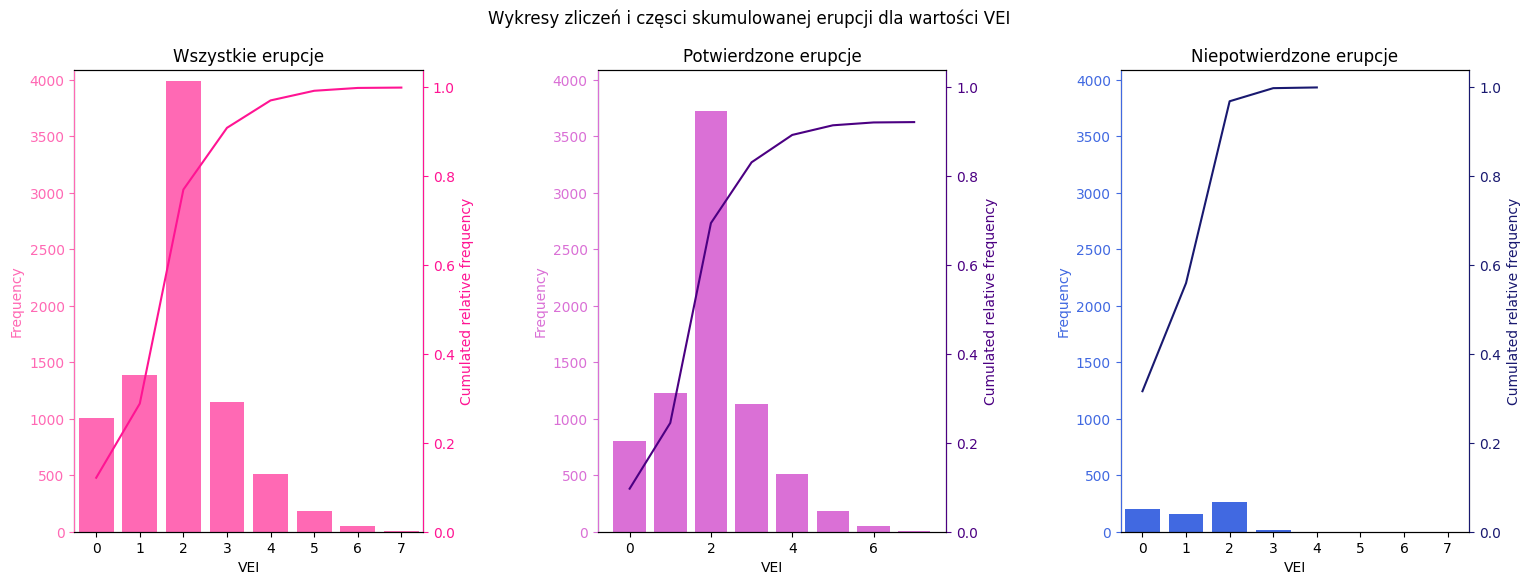

In [61]:
fig,ax = plt.subplots(1, 3, figsize = (18,6))
fig.suptitle('Wykresy zliczeń i częsci skumulowanej erupcji dla wartości VEI')
plt.subplots_adjust(wspace = 0.5)
max_y = vei_data_1['f'].max() + 100
ax[0].set_title('Wszystkie erupcje')
ax[0].bar(vei_data.index, vei_data["All eruptions"].f, color = "hotpink")
ax[0].set_xlim([-0.5,7.5])
ax[0].set_xlabel('VEI')
ax[0].set_ylim(0, max_y)
ax[0].set_ylabel('Frequency', color = 'hotpink')
ax[0].tick_params(axis='y', colors = 'hotpink')
ax[0] = ax[0].twinx()
ax[0].plot(vei_data.index, vei_data["All eruptions"].crf, color="deeppink")
ax[0].set_ylim([0,1.04])
ax[0].set_ylabel('Cumulated relative frequency', color = 'deeppink')
ax[0].tick_params(axis='y', colors = 'deeppink')
ax[0].spines['left'].set_color('hotpink')
ax[0].spines['right'].set_color('deeppink')

ax[1].set_title('Potwierdzone erupcje')
ax[1].bar(vei_data.index, vei_data["Confirmed Eruptions"].f, color = "orchid")
ax[2].set_xlim([-0.5,7.5])
ax[1].set_xlabel('VEI')
ax[1].set_ylim(0,max_y)
ax[1].set_ylabel('Frequency', color = 'orchid')
ax[1].tick_params(axis='y', colors = 'orchid')
ax[1] = ax[1].twinx()
ax[1].plot(vei_data.index, vei_data["Confirmed Eruptions"].crf, color="indigo")
ax[1].set_ylim([0,1.04])
ax[1].set_ylabel('Cumulated relative frequency', color = 'indigo')
ax[1].tick_params(axis = 'y', colors = 'indigo')
ax[1].spines['left'].set_color('orchid')
ax[1].spines['right'].set_color('indigo')

ax[2].set_title('Niepotwierdzone erupcje')
ax[2].bar(vei_data.index, vei_data["Uncertain Eruptions"].f, color = "royalblue")
ax[2].set_xlim([-0.5,7.5])
ax[2].set_xlabel('VEI')
ax[2].set_ylim(0,max_y)
ax[2].set_ylabel('Frequency', color = 'royalblue')
ax[2].tick_params(axis='y', colors = 'royalblue')
ax[2] = ax[2].twinx()
ax[2].plot(vei_data.index, vei_data["Uncertain Eruptions"].crf, color="midnightblue")
ax[2].set_ylim([0, 1.04])
ax[2].set_ylabel('Cumulated relative frequency', color = 'midnightblue')
ax[2].tick_params(axis = 'y', colors = 'midnightblue')
ax[2].spines['left'].set_color('royalblue')
ax[2].spines['right'].set_color('midnightblue')

                              

### Zadanie 5: Rodzaje metod wykrywania erupcji [10 pkt]

Przygotuj tablice `evidence_data` zawiarającą informacje o tym ile erupcji o poszczególnych wartościach VEI zostało potwierdzonych przy użyciu poszczególnych metod weryfikacji.
Tablica powinna zawierać następujące elementy:

> Indeks: 2-poziomowe nagłówki </br>

>> Nagłówki 1 poziomu: Kategorie dowodów </br>

>> Nagłówki 2 poziomu: Metody, które dostarczyły dowodów </br>

> Kolumny: VEI </br>
> Wartości VEI posortowane od najmniejszej do największej oraz kolumna "All", w której znajdują się dane dotyczące wszystkich erupcji, bez podziału na VEI.

Wyświetl przygotowane tablicę w taki sposób, aby zawarte w tablicy liczby (w tym wartości VEI w nagłówkach kolumn) wyświetlały się bez miejsc po przecinku.

In [194]:
 # opcja  1
um_1 = eruptions_data[eruptions_data["Evidence Type"] == "Observations"]["Evidence Method"].unique()
multi_index_1 = pd.MultiIndex.from_arrays([["Observations"] * len(um_1), um_1], names=['Evidence Type', 'Evidence Method'])
data_1 = pd.DataFrame(index=multi_index_1)

um_2 = eruptions_data[eruptions_data["Evidence Type"] == "Uncertain"]["Evidence Method"].unique()
multi_index_2 = pd.MultiIndex.from_arrays([["Uncertain"] * len(um_2), um_2], names=['Evidence Type', 'Evidence Method'])
data_2 = pd.DataFrame(index=multi_index_2)

um_3 = eruptions_data[eruptions_data["Evidence Type"] == "Isotopic"]["Evidence Method"].unique()
multi_index_3 = pd.MultiIndex.from_arrays([["Isotopic"] * len(um_3), um_3], names=['Evidence Type', 'Evidence Method'])
data_3 = pd.DataFrame(index=multi_index_3)

um_4 = eruptions_data[eruptions_data["Evidence Type"] == "Correlation"]["Evidence Method"].unique()
multi_index_4 = pd.MultiIndex.from_arrays([["Correlation"] * len(um_4), um_4], names=['Evidence Type', 'Evidence Method'])
data_4 = pd.DataFrame(index=multi_index_4)

um_5 = eruptions_data[eruptions_data["Evidence Type"] == "Sidereal"]["Evidence Method"].unique()
multi_index_5 = pd.MultiIndex.from_arrays([["Sidereal"] * len(um_5), um_5], names=['Evidence Type', 'Evidence Method'])
data_5 = pd.DataFrame(index=multi_index_5)

um_6 = eruptions_data[eruptions_data["Evidence Type"] == "Radiogenic"]["Evidence Method"].unique()
multi_index_6 = pd.MultiIndex.from_arrays([["Radiogenic"] * len(um_6), um_6], names=['Evidence Type', 'Evidence Method'])
data_6 = pd.DataFrame(index=multi_index_6)

multi_data = pd.concat([data_1, data_2, data_3, data_4, data_5, data_6])
evidence_counts = eruptions_data.groupby(["Evidence Type", "Evidence Method"]).size().reset_index(name='All')
multi_data = multi_data.join(evidence_counts.set_index(["Evidence Type", "Evidence Method"]))

minimum = min(eruptions_data["VEI"])
maximum = max(eruptions_data["VEI"])

vei_counts = eruptions_data.pivot_table(index=["Evidence Type", "Evidence Method"], 
                                        columns="VEI", 
                                        aggfunc="size", 
                                        fill_value=0)
multi_data = multi_data.join(vei_counts)
new_columns_order = [1, 2, 3, 4, 5, 6, 7,8,0]
evidence_data = multi_data[multi_data.columns[new_columns_order]]
evidence_data


################################################################################
#opcja 2 
evidence_data = pd.DataFrame()
evidence_data["All"] = eruptions_data.groupby(["Evidence Type", "Evidence Method"]).size()
vei_counts = eruptions_data.pivot_table(index=["Evidence Type", "Evidence Method"], 
                                        columns="VEI", 
                                        aggfunc="size", 
                                        fill_value=0)
evidence_data=evidence_data.join(vei_counts)
evidence_data = multi_data[multi_data.columns[new_columns_order]]
evidence_data

0     1     2    3    4   5   6  7   All
Evidence Type Evidence Method                                                 
Observations  Reported              376  1200  3430  837  194  42   7  1  6087
              Satellite (infrared)    1     0     1    1    0   0   0  0     3
              Satellite (visual)      0     2     3    1    0   0   0  0     6
              Seismicity             15     0     1    0    0   0   0  0    16
              Hydrophonic            68     3     0    0    0   0   0  0    71
              Photo / Video           1     1     1    0    0   0   0  0     3
              Aviation                0     1     0    0    0   0   0  0     1
Uncertain     Unspecified           204   138   271   22    1   0   0  0   636
Isotopic      Uranium-series         24     0     0    0    0   0   0  0    24
              14C (calibrated)       41    12    49  100  105  70  21  3   401
              14C (uncalibrated)    125     7    34   54   91  41  19  1   372
              Cosmic Ray Exposure    20     1     0    0    1   0   0  0    22
              Ar/Ar                  12     1     0    0    1   1   0  0    15
              K/Ar                   10     0     0    1    0   0   0  0    11
Correlation   Magnetism              34     0     5    0    2   0   0  0    41
              Tephrochronology       71    16   122  124  103  22   5  0   463
              Anthropology            4     1     5    2    6   1   0  0    19
Sidereal      Varve Count             0     1    66    8    1   0   0  0    76
              Dendrochronology        0     0     0    1    2   3   0  0     6
              Ice Core                0     0     3    0    3   0   1  2     9
Radiogenic    Fission track           0     0     0    1    0   0   0  0     1
              Thermoluminescence      1     0     0    0    1   0   0  0     2

In [195]:
# Test 1 Kształt tablicy
assert evidence_data.shape == (22, 9)
# # Test 2 Kolumny
assert len(set(list(evidence_data.columns)) & set([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 'All'])) == 9
# Test 3 Indeks
assert (eruptions_data.index.name == 'Eruption Number') == True
assert len(set(list(evidence_data.index)) & set([('Observations', 'Reported'), ('Observations', 'Satellite (infrared)'), ('Observations', 'Satellite (visual)'),
                                ('Observations', 'Seismicity'), ('Observations', 'Hydrophonic'), ('Observations', 'Photo / Video'), ('Observations', 'Aviation'),
                                ('Uncertain', 'Unspecified'), ('Isotopic', 'Uranium-series'), ('Isotopic', '14C (calibrated)'), ('Isotopic', '14C (uncalibrated)'),
                                ('Isotopic', 'Cosmic Ray Exposure'), ('Isotopic', 'Ar/Ar'), ('Isotopic', 'K/Ar'), ('Correlation', 'Magnetism'), ('Correlation', 'Tephrochronology'),
                                ('Correlation', 'Anthropology'), ('Sidereal', 'Varve Count'), ('Sidereal', 'Dendrochronology'), ('Sidereal', 'Ice Core'), ('Radiogenic', 'Fission track'),
                                ('Radiogenic', 'Thermoluminescence')])) == 22
# Test 4 Kilka losowo wybranych wartości w tablicy
assert evidence_data.loc[('Observations', 'Reported'), 0] == 376
assert evidence_data.loc[('Uncertain', 'Unspecified'), 3] == 22
assert evidence_data.loc[('Sidereal', 'Ice Core'), 7] == 2
assert evidence_data.loc[('Isotopic', '14C (uncalibrated)'), 5] == 41
assert evidence_data.loc[('Correlation', 'Anthropology'), 6] == 0

### Zadanie 6: Wizualizacja rozkładu zarejestrowanych erupcji w czasie [2 pkt]

Korzystając z funkcji `seaborn.stripplot()` zwizualizuj jak rozkładały się w czasie wystąpienia zarejestrowanych erupcji. Do rozróżnienia erupcji w czasie wykorzystaj rok, w którym nastąpił ich początek.

Wyniki zestaw na pojedynczej figurze (siatka wykresów 2x1). Na górnym wykresie przedstaw dane rozróżnione tylko po kątem VEI, a na dolnym wykresie przedstaw dane rozróżnione zarówno po VEI jak i rodzaju dowodu ich wystąpienia (Evidence Type). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- dodaj legendę do dolnego wykresu w taki sposób, aby nie zasłaniała znajdujących nię na nim danych,
- ustaw format wyświetlania wartości VEI bez miejsc po przecinku.

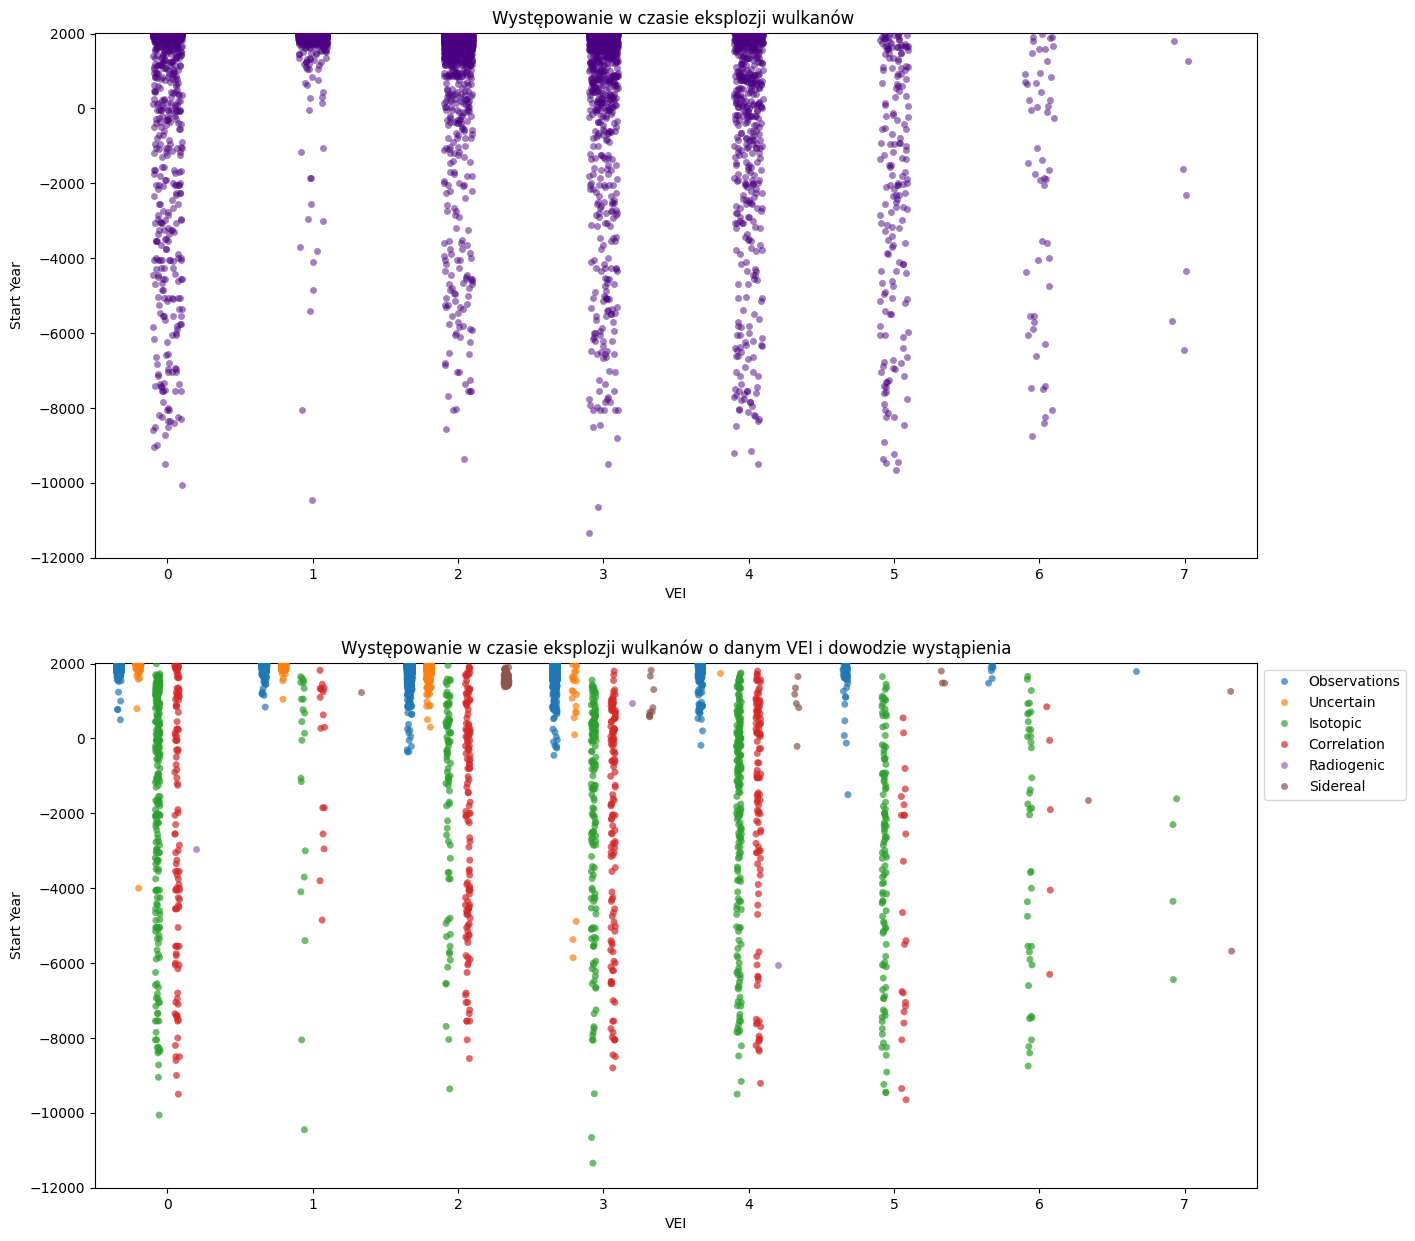

In [240]:
# YOUR CODE HERE
fig, ax = plt.subplots(2,1,figsize=(15,15), facecolor="white")

ax[0].set_facecolor("white")
#g=sns.stripplot(data = eruptions_data, x = "VEI", y = "Start Year", ax = ax[0], alpha = 1)
sns.stripplot(x='VEI', y='Start Year',ax=ax[0], data=eruptions_data, alpha = 0.5,color='indigo')
ax[0].set_xlabel('VEI')
ax[0].set_ylabel('Start Year')
ax[0].set_title('Występowanie w czasie eksplozji wulkanów ')
ax[0].set_ylim([-12000,2024])

sns.stripplot(data = eruptions_data, x = "VEI", y = "Start Year", ax = ax[1], hue="Evidence Type", dodge=True, alpha=0.7)
ax[1].set_ylim([-12000,2024])
ax[1].set_xlabel('VEI')
ax[1].set_ylabel('Start Year')
ax[1].set_title('Występowanie w czasie eksplozji wulkanów o danym VEI i dowodzie wystąpienia')
ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
